Problem:

we want to predict the prices of houses in bangalore based on different features. It is a regression problem.
We used multiple linear regression for the same.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999

## importing the data

In [2]:
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\ML - Bengaluru_House_Data (1).csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,@@@@@@,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7819 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# statistical overview
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Data Preprocessing

In [5]:
# lets work on first categorical feature area type

df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
# encoding area type through map function

df1["area_type"] = df1["area_type"].map({'Super built-up  Area':4,'Built-up  Area':3, 'Plot  Area':2,'Carpet  Area':1 })

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7819 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [8]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5501
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
# our work for area type is done as there are no more null values too

In [10]:
# moving on to feature 2: availability
# there is no null value in availability too, we just want to convert it too int

In [11]:
df1["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [12]:
# moving on to: location           

In [13]:
df1['location'].nunique()

1305

In [14]:
# our idea is to decrease the number of variables in order to apply one hot ecoding

other = df1['location'].value_counts()[df1["location"].value_counts() <= 100]

In [15]:
df1.location = df1.location.apply(lambda x: 'other' if x in other else x)

# code copied from google

In [16]:
df1["location"].value_counts(ascending=False)[0:20]

other                       9815
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    213
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Bannerghatta Road            152
Hennur Road                  152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Name: location, dtype: int64

In [17]:
df1["location"].nunique()

# later we will perform one hot encoding on this data

17

In [18]:
df2=df1

# saving 

In [19]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,other,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3 BHK,@@@@@@,1440,2.0,3.0,62.00
3,4,Ready To Move,other,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Ready To Move,other,2 BHK,NaN,1200,2.0,1.0,51.00


In [20]:
df2.location.isnull().sum()

1

In [21]:
df2['location'].mode()

0    other
dtype: object

In [22]:
df2[df2.location.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,4,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [23]:
df2.loc[568,'location'] = 'other'

In [24]:
df2.location.isnull().sum()

# finally we are able to remove this nan value

0

In [25]:
# moving on to column size

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13304 non-null object
society         7819 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [26]:
# we can see that there are some missing values in size, and also the column is in object, lets try to fix that

In [27]:
df2['size'] = df2['size'].str.split(' ').str[0]

In [28]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,other,4,Theanmp,2600,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3,@@@@@@,1440,2.0,3.0,62.00
3,4,Ready To Move,other,3,Soiewre,1521,3.0,1.0,95.00
4,4,Ready To Move,other,2,NaN,1200,2.0,1.0,51.00


In [29]:
df2.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5501
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13304 non-null object
society         7819 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [31]:
df2['size'].mode()

0    2
dtype: object

In [32]:
df2['size'].fillna(2,inplace=True)

In [33]:
df2.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5501
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [34]:
df2['size'] = df2['size'].astype(int)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
society         7819 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 884.7+ KB


In [36]:
# all the missing values in size have been filled and data type in now int

## society

In [37]:
# moving on to societty 

df3 = df2 #saving

In [38]:
df3.society.isnull().sum()

5501

In [39]:
df3.society.nunique()

2689

In [40]:
df3.society.value_counts()[0:20]

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Bhmesy     51
Prtanha    51
Prityel    50
Prarkun    49
PrityTr    49
Dhalsh     47
IBityin    45
SNity S    40
Soresea    39
Adeatlm    37
Soitya     36
Rosha I    35
Bhe 2ko    35
SunceEs    34
SNnia E    33
Name: society, dtype: int64

In [41]:
df3.society.value_counts(ascending=True)[0:20]

Krtonwe    1
MNlam G    1
NCold G    1
Shentnd    1
Aincyev    1
BancyRe    1
HivanBr    1
Jeshan     1
ShentAp    1
VSineDi    1
Sutesga    1
CiaksRi    1
Tentsw     1
Mancyes    1
RMerslu    1
Mas 2 H    1
SLoraFl    1
PriumMi    1
Ajomaa     1
RortsCo    1
Name: society, dtype: int64

In [42]:
# lets apply the same method we applied on location

other2 = df3['society'].value_counts()[df3["society"].value_counts() <= 30]

other2.head()

JRrnauv    30
MenueNo    29
PuandHi    28
Prlla C    28
Prncyrn    27
Name: society, dtype: int64

In [43]:
df3['society'] = df3.society.apply(lambda x: 'other' if x in other2 else x)

# code copied from google

In [44]:
df3.society.nunique()

21

In [45]:
df3.society.value_counts()

other      6858
GrrvaGr      80
PrarePa      76
Prtates      59
Sryalan      59
GMown E      56
Bhmesy       51
Prtanha      51
Prityel      50
Prarkun      49
PrityTr      49
Dhalsh       47
IBityin      45
SNity S      40
Soresea      39
Adeatlm      37
Soitya       36
Rosha I      35
Bhe 2ko      35
SunceEs      34
SNnia E      33
Name: society, dtype: int64

In [46]:
df3.society.nunique()

21

In [47]:
df3.society.isnull().sum()

5501

In [48]:
df3.shape

(13320, 9)

In [49]:
(5501/13320)*100

41.2987987987988

In [50]:
# 41% missing values
# there was really no need to work on this column, we can simply drop it

In [51]:
df4 = df3

df4.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2,other,1056,2.0,1.0,39.07
1,2,Ready To Move,other,4,other,2600,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3,other,1440,2.0,3.0,62.00
3,4,Ready To Move,other,3,other,1521,3.0,1.0,95.00
4,4,Ready To Move,other,2,NaN,1200,2.0,1.0,51.00


In [52]:
df4.drop('society',axis=1, inplace = True)

df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,2,Ready To Move,other,4,2600,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,4,Ready To Move,other,3,1521,3.0,1.0,95.00
4,4,Ready To Move,other,2,1200,2.0,1.0,51.00


In [53]:
df3.head()
df4=df3.copy()


## total_sqft      

In [54]:
df4.info()

# for some reason the dtype is categorical, we need to solve this prpblem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 780.6+ KB


In [55]:
df4.total_sqft.isnull().sum()

# there are no null values

0

In [56]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,4,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,2,Ready To Move,other,4,2600,5.0,3.0,120.00
2,3,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,4,Ready To Move,other,3,1521,3.0,1.0,95.00
4,4,Ready To Move,other,2,1200,2.0,1.0,51.00


In [57]:
# after checking the excel file, i saw some ranges are also present, lets try to solve it

df4["total_sqft1"] = df4["total_sqft"].str.split('-').str[0]
df4["total_sqft2"] = df4["total_sqft"].str.split('-').str[1]

In [58]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft1,total_sqft2
0,4,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07,1056,NaN
1,2,Ready To Move,other,4,2600,5.0,3.0,120.00,2600,NaN
2,3,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00,1440,NaN
3,4,Ready To Move,other,3,1521,3.0,1.0,95.00,1521,NaN
4,4,Ready To Move,other,2,1200,2.0,1.0,51.00,1200,NaN


In [59]:
# now the ideal way to actually take the mean of every cell where a range is present, 
# but its required to build some function for the same, so we will be sticking with the minimum value for now 

In [60]:
df4.drop('total_sqft2',axis=1,inplace=True)
df4.drop('total_sqft',axis=1,inplace=True)

In [61]:
df4.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft1
0,4,19-Dec,Electronic City Phase II,2,2.0,1.0,39.07,1056
1,2,Ready To Move,other,4,5.0,3.0,120.00,2600
2,3,Ready To Move,Uttarahalli,3,2.0,3.0,62.00,1440
3,4,Ready To Move,other,3,3.0,1.0,95.00,1521
4,4,Ready To Move,other,2,2.0,1.0,51.00,1200


In [62]:
df4["total_sqft2"] = df4["total_sqft1"].str.split('A').str[0]

# A for area

In [63]:
df4["total_sqft3"] = df4["total_sqft2"].str.split('Y').str[0]

# Y for Yards

In [64]:
df4["total_sqft4"] = df4["total_sqft3"].str.split('S').str[0]

# S for sq meter

In [65]:
df4["total_sqft5"] = df4["total_sqft4"].str.split('P').str[0]

# P for Perch

In [66]:
df4["total_sqft6"] = df4["total_sqft5"].str.split('C').str[0]

# c for cents, g for gunth

In [67]:
df4["total_sqft7"] = df4["total_sqft6"].str.split('G').str[0]

In [68]:
# now we can change the datatype of this 
df4['total_sqft7'].astype(float)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft7, Length: 13320, dtype: float64

In [69]:
df4.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft1,total_sqft2,total_sqft3,total_sqft4,total_sqft5,total_sqft6,total_sqft7
0,4,19-Dec,Electronic City Phase II,2,2.0,1.0,39.07,1056,1056,1056,1056,1056,1056,1056
1,2,Ready To Move,other,4,5.0,3.0,120.00,2600,2600,2600,2600,2600,2600,2600
2,3,Ready To Move,Uttarahalli,3,2.0,3.0,62.00,1440,1440,1440,1440,1440,1440,1440
3,4,Ready To Move,other,3,3.0,1.0,95.00,1521,1521,1521,1521,1521,1521,1521
4,4,Ready To Move,other,2,2.0,1.0,51.00,1200,1200,1200,1200,1200,1200,1200


In [70]:
df4.drop('total_sqft1',axis=1,inplace=True)
df4.drop('total_sqft2',axis=1,inplace=True)
df4.drop('total_sqft3',axis=1,inplace=True)
df4.drop('total_sqft4',axis=1,inplace=True)
df4.drop('total_sqft5',axis=1,inplace=True)
df4.drop('total_sqft6',axis=1,inplace=True)

In [71]:
df4.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft7
0,4,19-Dec,Electronic City Phase II,2,2.0,1.0,39.07,1056
1,2,Ready To Move,other,4,5.0,3.0,120.00,2600
2,3,Ready To Move,Uttarahalli,3,2.0,3.0,62.00,1440
3,4,Ready To Move,other,3,3.0,1.0,95.00,1521
4,4,Ready To Move,other,2,2.0,1.0,51.00,1200


In [72]:
df4['total_sqft7'].astype(float)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft7, Length: 13320, dtype: float64

In [73]:
df4["total_sqft7"] = df4["total_sqft7"].str.split('P').str[0]

In [74]:
df4['total_sqft7']= df4['total_sqft7'].astype('float64')

In [75]:
df4.info()

# finally we are able to convert this into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
total_sqft7     13320 non-null float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 780.6+ KB


In [76]:
df4.total_sqft7.isnull().sum()

0

## bath            

In [77]:
# moving on to the next column, bathroom

In [78]:
df5 = df4

In [79]:
df5.bath.isnull().sum()

#  one problem is the number of missing values

73

In [80]:
df5.info()

# other problem is that bathroom is in float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
total_sqft7     13320 non-null float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 780.6+ KB


In [81]:
df5.bath.median()

2.0

In [82]:
df5.bath.fillna(2,inplace=True)

In [83]:
df5.bath.isnull().sum()

# missing values have been handled by median, since it was better than mean for this case
# and mode is usually applied on categorical data 

0

In [84]:
df5['bath']= df5['bath'].astype('int32')

In [85]:
df5.info()

# fixed bath column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
bath            13320 non-null int32
balcony         12711 non-null float64
price           13320 non-null float64
total_sqft7     13320 non-null float64
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 728.6+ KB


## balcony

In [86]:
df5.balcony.median()

2.0

In [87]:
df5['balcony'].fillna(2,inplace=True)

In [88]:
df5['balcony']= df5['balcony'].astype('int32')

In [89]:
df5.info()

# fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type       13320 non-null int64
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null int32
bath            13320 non-null int32
balcony         13320 non-null int32
price           13320 non-null float64
total_sqft7     13320 non-null float64
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 676.5+ KB


## price

In [90]:
df5.price.isnull().sum()
# price is in float and there are no null values present

0

## availability

In [91]:
# coming back to availability 
# the best idea to fix this column is to write 'ready to move' and assign values 0(for false) and 1(True) in our model

df5.availability.isnull().sum()

0

In [92]:
df5['availability'] = df5['availability'].replace('Ready To Move',1)

In [93]:
df5['availability']=df5['availability'].replace('Immediate Possession',1)

In [94]:
df5['availability'] = df5.availability.apply(lambda x: 0 if x!=1 else x)

In [95]:
df5.rename(columns = {'availability':'Ready to move'}, inplace = True)

In [96]:
df5.head()


# the whole column has been renamed to make more sense

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7
0,4,0,Electronic City Phase II,2,2,1,39.07,1056.0
1,2,1,other,4,5,3,120.00,2600.0
2,3,1,Uttarahalli,3,2,3,62.00,1440.0
3,4,1,other,3,3,1,95.00,1521.0
4,4,1,other,2,2,1,51.00,1200.0


In [97]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type        13320 non-null int64
Ready to move    13320 non-null int64
location         13320 non-null object
size             13320 non-null int32
bath             13320 non-null int32
balcony          13320 non-null int32
price            13320 non-null float64
total_sqft7      13320 non-null float64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 676.5+ KB


# outliers

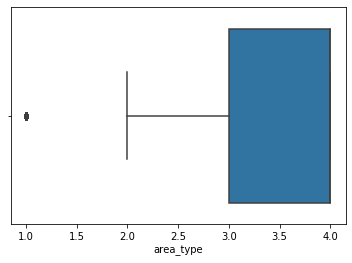

In [98]:
sns.boxplot('area_type',data=df5)

In [99]:
upper_limit1 = df5["area_type"].mean() + 3* df5["area_type"].std()
upper_limit1

5.805522858459774

In [100]:
lower_limit1 = df5["area_type"].mean() - 3 * df5["area_type"].std()
lower_limit1

1.1841167811798652

In [101]:
df5[(df5["area_type"]>5.8) | (df5["area_type"]<1.1)]

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7
297,1,1,other,2,2,2,47.0,950.0
340,1,1,other,2,2,3,48.0,1230.0
352,1,1,other,3,3,2,75.0,1592.0
594,1,1,other,2,2,2,98.0,1100.0
622,1,1,Bannerghatta Road,3,3,2,95.0,1445.0
...,...,...,...,...,...,...,...,...
13006,1,1,other,3,3,1,42.0,1280.0
13183,1,1,other,2,1,1,65.0,600.0
13214,1,1,Bannerghatta Road,3,2,1,85.0,1470.0
13238,1,0,other,2,2,3,70.0,1200.0


In [102]:
df5["area_type"] = np.where(df5["area_type"]>upper_limit1,6,
            np.where(df5["area_type"]<lower_limit1,1,
                    df5["area_type"]))

# WE TOOK 6 AND 1 BECAUSE AREA CANNOT BE IN FLOAT

In [103]:
df5[(df5["area_type"]>6) | (df5["area_type"]<1)]

# outliers from area_type have been trimmed 

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7


In [104]:
df5.shape

(13320, 8)

## outlier in size

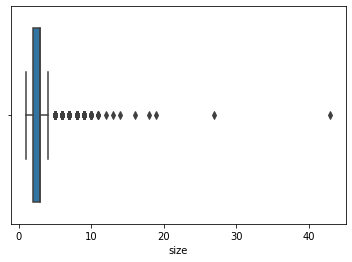

In [105]:
sns.boxplot(df5['size'])

In [106]:
upper_limit2 = df5["size"].mean() + 3* df5["size"].std()
upper_limit2

6.6862643817611325

In [107]:
lower_limit2 = df5["size"].mean() - 3* df5["size"].std()
lower_limit2

-1.0807088262055777

In [108]:
df5[(df5["size"]>6.6) | (df5["size"]<-1.1)]

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7
45,2,1,other,8,9,2,200.0,600.0
64,3,1,other,8,8,0,140.0,3000.0
68,2,1,other,8,7,0,85.0,1350.0
129,2,1,other,7,7,0,115.0,950.0
140,3,1,Hennur Road,8,8,2,250.0,5000.0
...,...,...,...,...,...,...,...,...
13219,2,1,other,7,9,3,132.0,1590.0
13221,2,1,other,9,9,1,75.0,1178.0
13226,3,1,Raja Rajeshwari Nagar,8,8,3,215.0,6000.0
13277,2,1,other,7,7,2,218.0,1400.0


In [109]:
df5["size"] = np.where(df5["size"]>upper_limit2,7,
            np.where(df5["size"]<lower_limit2,lower_limit2,
                    df5["size"]))

# WE TOOK 7 INSTEAD OF 6.6 BECAUSE SIZE CANNOT BE IN FLOAT

In [110]:
df5[(df5["size"]>7) | (df5["size"]<-1.1)]

#  capping has been done

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7


In [111]:
# outliers from size have been removed

In [112]:
df5.head()

,area_type,Ready to move,location,size,bath,balcony,price,total_sqft7
0,4,0,Electronic City Phase II,2.0,2,1,39.07,1056.0
1,2,1,other,4.0,5,3,120.00,2600.0
2,3,1,Uttarahalli,3.0,2,3,62.00,1440.0
3,4,1,other,3.0,3,1,95.00,1521.0
4,4,1,other,2.0,2,1,51.00,1200.0


In [113]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type        13320 non-null int64
Ready to move    13320 non-null int64
location         13320 non-null object
size             13320 non-null float64
bath             13320 non-null int32
balcony          13320 non-null int32
price            13320 non-null float64
total_sqft7      13320 non-null float64
dtypes: float64(3), int32(2), int64(2), object(1)
memory usage: 728.6+ KB


In [114]:
df5.rename(columns = {'size':"Size (in BHK)"}, inplace = True)

In [115]:
df5['Size (in BHK)']=df5["Size (in BHK)"].astype(int)

In [116]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
area_type        13320 non-null int64
Ready to move    13320 non-null int64
location         13320 non-null object
Size (in BHK)    13320 non-null int32
bath             13320 non-null int32
balcony          13320 non-null int32
price            13320 non-null float64
total_sqft7      13320 non-null float64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 676.5+ KB


## outliers in bath

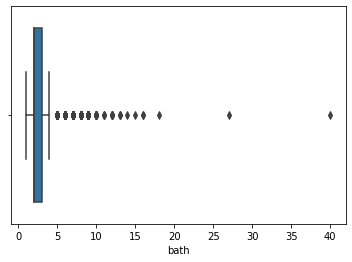

In [117]:
sns.boxplot(df5['bath'])

In [118]:
upper_limit3 = df5["bath"].mean() + 3* df5["bath"].std()
upper_limit3

6.70507514508175

In [119]:
lower_limit3 = df5['bath'].mean() - 3* df5['bath'].std()
lower_limit3

-1.327447517454122

In [120]:
df5["bath"] = np.where(df5["bath"]>upper_limit3,7,
            np.where(df5["bath"]<lower_limit3,1,
                    df5["bath"]))

# taking 7 just to be safe
# taking 1 because there has to be 1 bathroom

In [121]:
df5[(df5["bath"]>7) | (df5["bath"]<1)]

,area_type,Ready to move,location,Size (in BHK),bath,balcony,price,total_sqft7


## outlier in balcony

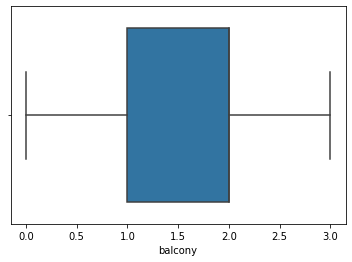

In [122]:
sns.boxplot(df5['balcony'])

# no outlier present in balcony

## outlier in price

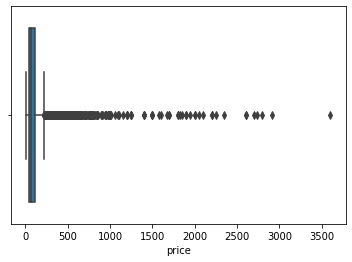

In [123]:
sns.boxplot(df5['price'])

In [124]:
upper_limit4 = df5['price'].mean() + 3* df5['price'].std()
upper_limit4

559.4806478105246

In [125]:
lower_limit4 = df5['price'].mean() - 3* df5['price'].std()
lower_limit4


-334.3493948075218

In [126]:
import numpy as np


In [127]:
df5["bath"] = np.where(df5["bath"]>upper_limit4,upper_limit4,
            np.where(df5["bath"]<lower_limit4,lower_limit4,
                    df5["bath"]))

In [128]:
df5[(df5["bath"]>560) | (df5["bath"]<-334)]

,area_type,Ready to move,location,Size (in BHK),bath,balcony,price,total_sqft7


In [129]:
# capping has been done

## outlier in total_sqft7

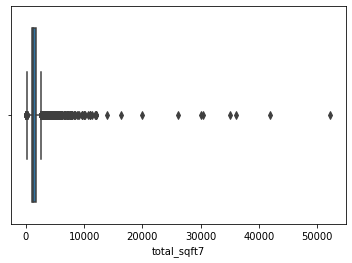

In [130]:
sns.boxplot(df5['total_sqft7'])

In [131]:
upper_limit5 = df5['total_sqft7'].mean() + 3* df5['total_sqft7'].std()
upper_limit5

5262.724920174647

In [132]:
lower_limit5 = df5['total_sqft7'].mean() - 3* df5['total_sqft7'].std()
lower_limit5

-2156.8239667211947

In [133]:
df5["total_sqft7"] = np.where(df5["total_sqft7"]>upper_limit5,upper_limit5,
            np.where(df5["total_sqft7"]<lower_limit5,lower_limit5,
                    df5["total_sqft7"]))

In [134]:
df5[(df5["total_sqft7"]>5263) | (df5["total_sqft7"]<-2156)]

,area_type,Ready to move,location,Size (in BHK),bath,balcony,price,total_sqft7


In [135]:
# outliers have been capped

## Visualisation

[Text(0.5, 1.0, 'Count of flats based on their area type')]

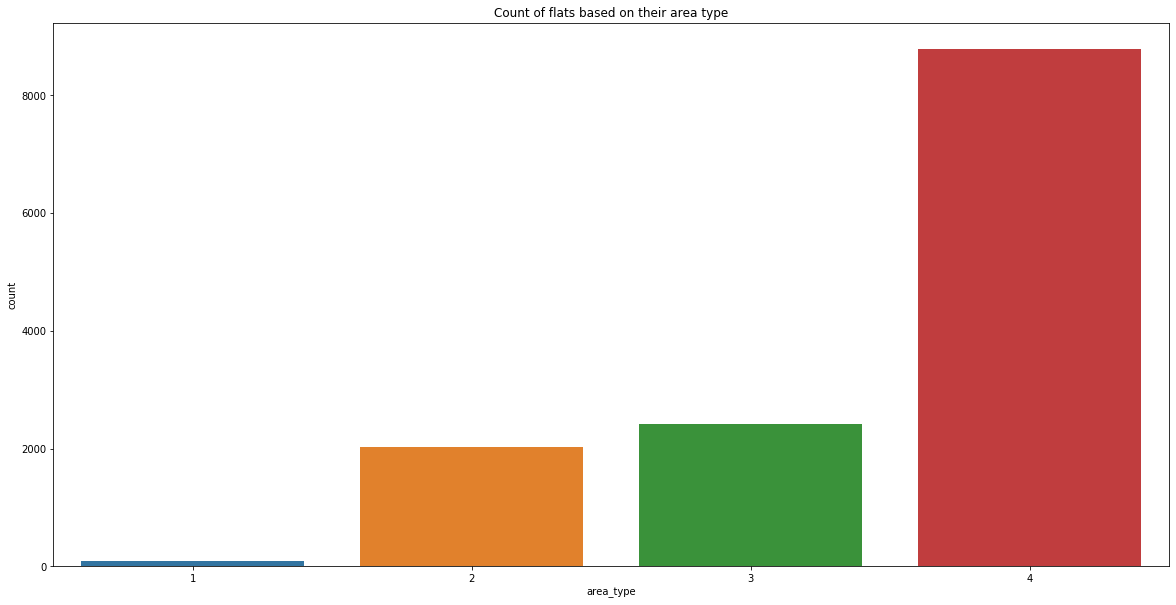

In [136]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df5, x='area_type', ax=ax)
ax.set(title='Count of flats based on their area type')

    'Super built-up  Area':4
    'Built-up  Area':3
    'Plot  Area':2
    'Carpet  Area':1
    
We can see that most of the available flats are Super Build up area type.

[Text(0.5, 1.0, 'Count of flats based on their availibility')]

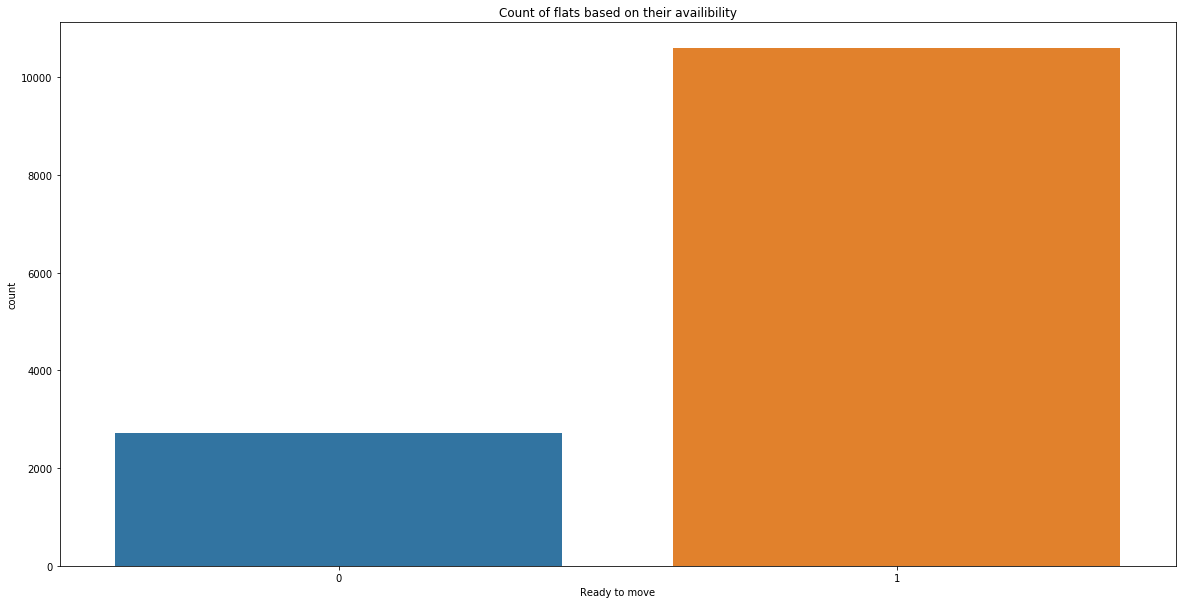

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=df5, x='Ready to move', ax=ax)
ax.set(title='Count of flats based on their availibility')

most of the flats are available for move in.

[Text(0.5, 1.0, 'Count of flats based on their location')]

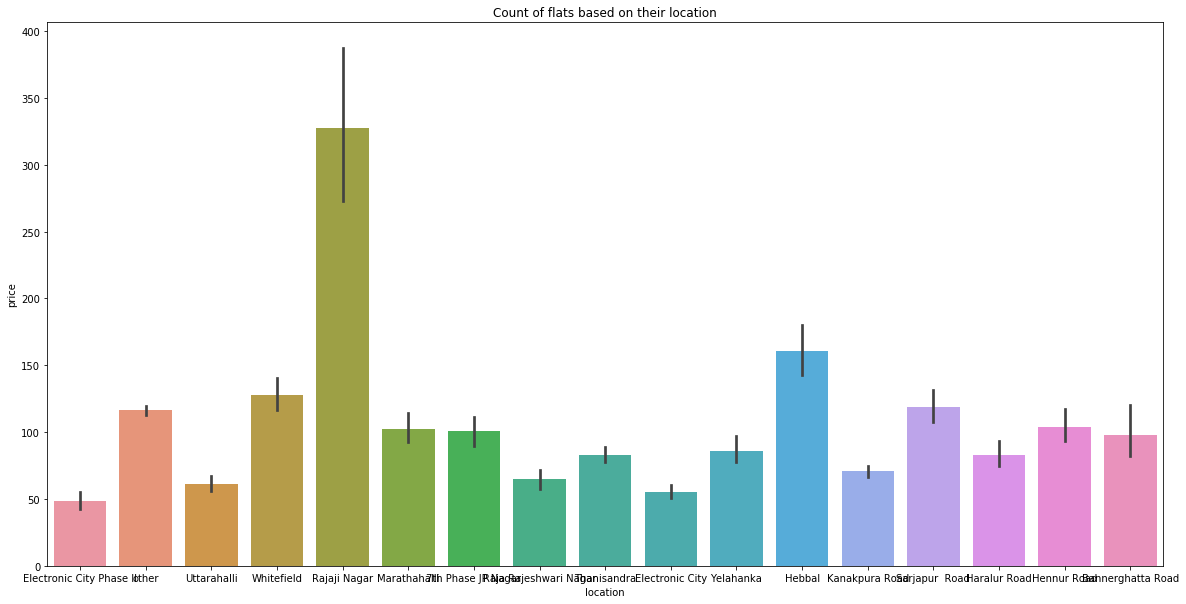

In [138]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df5, x='location',y='price', ax=ax)
ax.set(title='Count of flats based on their location')

Property price in rajaji nagar is higher than other locations

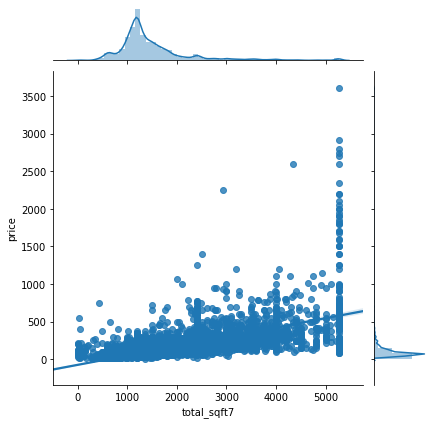

In [139]:
sns.jointplot(x="total_sqft7",y="price",data=df5,kind="reg")

There is a positive co relation between Area of the property and the Price of the property

# ENCODING LOCATION

In [140]:
df5.head()

,area_type,Ready to move,location,Size (in BHK),bath,balcony,price,total_sqft7
0,4,0,Electronic City Phase II,2,2.0,1,39.07,1056.0
1,2,1,other,4,5.0,3,120.00,2600.0
2,3,1,Uttarahalli,3,2.0,3,62.00,1440.0
3,4,1,other,3,3.0,1,95.00,1521.0
4,4,1,other,2,2.0,1,51.00,1200.0


In [141]:
df6 = df5

In [142]:
df7 = pd.get_dummies(df6,columns=["location"] ,drop_first = True)

In [143]:
df7.columns

Index(['area_type', 'Ready to move', 'Size (in BHK)', 'bath', 'balcony',
       'price', 'total_sqft7', 'location_Bannerghatta Road',
       'location_Electronic City', 'location_Electronic City Phase II',
       'location_Haralur Road', 'location_Hebbal', 'location_Hennur Road',
       'location_Kanakpura Road', 'location_Marathahalli',
       'location_Raja Rajeshwari Nagar', 'location_Rajaji Nagar',
       'location_Sarjapur  Road', 'location_Thanisandra',
       'location_Uttarahalli', 'location_Whitefield', 'location_Yelahanka',
       'location_other'],
      dtype='object')

In [144]:
df7.shape

(13320, 23)

In [145]:
df7.head()

,area_type,Ready to move,Size (in BHK),bath,balcony,price,total_sqft7,location_Bannerghatta Road,location_Electronic City,location_Electronic City Phase II,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_other
0,4,0,2,2.0,1,39.07,1056.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,4,5.0,3,120.00,2600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,3,2.0,3,62.00,1440.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,1,3,3.0,1,95.00,1521.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,1,2,2.0,1,51.00,1200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## splitting the dataset

In [152]:
df7['Price'] = df7['price']

In [159]:
df7.drop('price',axis=1, inplace = True)

In [162]:
df7.head()

,area_type,Ready to move,Size (in BHK),bath,balcony,total_sqft7,location_Bannerghatta Road,location_Electronic City,location_Electronic City Phase II,location_Haralur Road,location_Hebbal,location_Hennur Road,location_Kanakpura Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_other,Price
0,4,0,2,2.0,1,1056.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,39.07
1,2,1,4,5.0,3,2600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,120.00
2,3,1,3,2.0,3,1440.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,62.00
3,4,1,3,3.0,1,1521.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,95.00
4,4,1,2,2.0,1,1200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,51.00


In [163]:
X = df7.iloc[:, :-1].values
y = df7.iloc[:, -1].values

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating the model

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = [LinearRegression(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         GradientBoostingRegressor()]

In [187]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [188]:
for model in models:
    train(model)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV score: 11429.239252070893
Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
CV score: 16315.7401175245


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
CV score: 11954.43491191472
Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto'

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [194]:
from sklearn.linear_model import LinearRegression
regressor = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [195]:
y_pred = regressor.predict(X_test)

In [196]:
y_pred

array([ 65.83805255, 129.64958182,  95.04564464, ...,  52.05533155,
       367.20530042, 186.0407157 ])

## checking accuracy

In [197]:
import statsmodels.formula.api as sm

In [199]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 57.76
